<a href="https://colab.research.google.com/github/nramelia2/DATA-SCIENTIST/blob/main/13%20NAIVE%20BAYES/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

**Connect Google Drive**


In [2]:
!gdown --id "10A3zTKhP_AUqEolNlGt-asAV2ia9m8Qb"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10A3zTKhP_AUqEolNlGt-asAV2ia9m8Qb
To: /content/adult.csv
100% 3.97M/3.97M [00:00<00:00, 72.6MB/s]


**Import Data**

In [3]:
df = pd.read_csv('/content/adult.csv', header=None, sep=',\s')

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


**Exploratory data analysis**

In [4]:
# view dimensions of dataset
df.shape

(32561, 15)

In [5]:
# preview the dataset - View top 10 rows of dataset
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# Rename column names
column_names = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship',
             'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income']
df.columns = column_names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
# preview the dataset - View top 5 rows of dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Explore categorical variables
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [10]:
# view the categorical variables
df[categorical].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [11]:
# Explore problems within categorical variables - Missing values in categorical variables
# check missing values in categorical variables
df[categorical].isnull().sum()

Workclass         0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
Income            0
dtype: int64

In [12]:
# Frequency counts of categorical variables
# view frequency counts of values in categorical variables
for var in categorical: 
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

In [13]:
# view frequency distribution of categorical variables
for var in categorical: 
    print(df[var].value_counts()/np.float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: Education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: Marital_status, dtype: float64


<ipython-input-13-67db5e2ce67a>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))


In [14]:
# Explore workclass variable
# check labels in workclass variable
df.Workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
# check frequency distribution of values in workclass variable
df.Workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [16]:
# replace '?' values in workclass variable with `NaN`
df['Workclass'].replace('?', np.NaN, inplace=True)

In [17]:
# again check the frequency distribution of values in workclass variable
df.Workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [18]:
# Explore occupation variable
# check labels in occupation variable
df.Occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [19]:
# check frequency distribution of values in occupation variable
df.Occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [20]:
# replace '?' values in occupation variable with `NaN`
df['Occupation'].replace('?', np.NaN, inplace=True)

In [21]:
# again check the frequency distribution of values in occupation variable
df.Occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [22]:
# Explore native_country variable
# check labels in native_country variable
df.Native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [23]:
# check frequency distribution of values in native_country variable
df.Native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [24]:
# replace '?' values in native_country variable with `NaN`
df['Native_country'].replace('?', np.NaN, inplace=True)

In [25]:
# again check the frequency distribution of values in native_country variable
df.Native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [26]:
# Check missing values in categorical variables again
df[categorical].isnull().sum()

Workclass         1836
Education            0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Native_country     583
Income               0
dtype: int64

In [27]:
# Number of labels: cardinality
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Workclass  contains  9  labels
Education  contains  16  labels
Marital_status  contains  7  labels
Occupation  contains  15  labels
Relationship  contains  6  labels
Race  contains  5  labels
Sex  contains  2  labels
Native_country  contains  42  labels
Income  contains  2  labels


In [28]:
# Explore Numerical Variables
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [29]:
# view the numerical variables
df[numerical].head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [30]:
# check missing values in numerical variables
df[numerical].isnull().sum()

Age               0
Fnlwgt            0
Education_num     0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
dtype: int64

**Declare feature vector and target variable**

In [31]:
X = df.drop(['Income'], axis=1)
y = df['Income']

**Split data into separate training and test set**

In [32]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

In [33]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((26048, 14), (6513, 14))

**Feature Engineering**

In [34]:
# check data types in X_train
X_train.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
dtype: object

In [35]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [36]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [37]:
# Engineering missing values in categorical variables
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

Workclass         0.056434
Education         0.000000
Marital_status    0.000000
Occupation        0.056588
Relationship      0.000000
Race              0.000000
Sex               0.000000
Native_country    0.018120
dtype: float64

In [38]:
# print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

Workclass 0.056434275184275184
Occupation 0.056587837837837836
Native_country 0.01812039312039312


In [39]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['Workclass'].fillna(X_train['Workclass'].mode()[0], inplace=True)
    df2['Occupation'].fillna(X_train['Occupation'].mode()[0], inplace=True)
    df2['Native_country'].fillna(X_train['Native_country'].mode()[0], inplace=True)    

In [40]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

Workclass         0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
dtype: int64

In [41]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

Workclass         0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
dtype: int64

In [42]:
# check missing values in X_train
X_train.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

In [43]:
# check missing values in X_test
X_test.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

In [44]:
# Encode categorical variables
# print categorical variables
categorical

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [45]:
X_train[categorical].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
13973,Private,Assoc-acdm,Divorced,Transport-moving,Not-in-family,White,Male,United-States
18189,Private,Prof-school,Married-civ-spouse,Sales,Wife,Amer-Indian-Eskimo,Female,South
22641,Private,12th,Never-married,Adm-clerical,Own-child,White,Female,United-States
18894,Private,HS-grad,Never-married,Adm-clerical,Own-child,Black,Female,United-States
14520,Private,9th,Never-married,Machine-op-inspct,Own-child,White,Male,Mexico


In [46]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.6 MB/s eta 0:00:00


In [47]:
# import category encoders
import category_encoders as ce

In [48]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 
                                 'Race', 'Sex', 'Native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [49]:
X_train.head()

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Fnlwgt,...,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40,Native_country_41
13973,45,1,0,0,0,0,0,0,0,140664,...,0,0,0,0,0,0,0,0,0,0
18189,42,1,0,0,0,0,0,0,0,119359,...,0,0,0,0,0,0,0,0,0,0
22641,20,1,0,0,0,0,0,0,0,196678,...,0,0,0,0,0,0,0,0,0,0
18894,26,1,0,0,0,0,0,0,0,130931,...,0,0,0,0,0,0,0,0,0,0
14520,18,1,0,0,0,0,0,0,0,79443,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train.shape

(26048, 105)

In [51]:
X_test.head()

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Fnlwgt,...,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40,Native_country_41
11838,23,1,0,0,0,0,0,0,0,200677,...,0,0,0,0,0,0,0,0,0,0
16973,26,1,0,0,0,0,0,0,0,213625,...,0,0,0,0,0,0,0,0,0,0
30370,46,1,0,0,0,0,0,0,0,285750,...,0,0,0,0,0,0,0,0,0,0
11748,45,1,0,0,0,0,0,0,0,108993,...,0,0,0,0,0,0,0,0,0,0
8270,43,1,0,0,0,0,0,0,0,118308,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_test.shape

(6513, 105)

**Feature Scaling**

In [53]:
cols = X_train.columns

In [54]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [56]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [57]:
X_train.head()

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,Fnlwgt,...,Native_country_32,Native_country_33,Native_country_34,Native_country_35,Native_country_36,Native_country_37,Native_country_38,Native_country_39,Native_country_40,Native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.315858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.494401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.397424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.828910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Model training**

In [58]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

**Predict the results**

In [59]:
y_pred = gnb.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array(['<=50K', '>50K', '>50K', ..., '<=50K', '>50K', '>50K'], dtype='<U5')

**Check accuracy score**

In [60]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7972


In [61]:
# Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)
y_pred_train

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [62]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8029


In [63]:
# Check for overfitting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Training set score: 0.8029
Test set score: 0.7972


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [64]:
# Compare model accuracy with null accuracy
# check class distribution in test set
y_test.value_counts()

<=50K    4927
>50K     1586
Name: Income, dtype: int64

In [65]:
# check null accuracy score
null_accuracy = (4970/(4970+1543))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7631


**Confusion matrix**

In [66]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3897 1030]
 [ 291 1295]]

True Positives(TP) =  3897

True Negatives(TN) =  1295

False Positives(FP) =  1030

False Negatives(FN) =  291


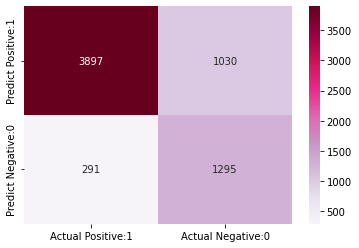

In [67]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuRd')

**Classification metrices**

In [68]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.79      0.86      4927
        >50K       0.56      0.82      0.66      1586

    accuracy                           0.80      6513
   macro avg       0.74      0.80      0.76      6513
weighted avg       0.84      0.80      0.81      6513



In [69]:
# Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [70]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7972


In [71]:
# Classification error
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2028


In [72]:
# Precision
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7909


In [73]:
# Recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9305


In [74]:
# True Positive Rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9305


In [75]:
# False Positive Rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4430


In [76]:
# Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5570


**Calculate class probabilities**

In [77]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[9.99999983e-01, 1.65469223e-08],
       [1.25697697e-01, 8.74302303e-01],
       [4.03844107e-04, 9.99596156e-01],
       [9.99998710e-01, 1.29028812e-06],
       [1.28437490e-09, 9.99999999e-01],
       [9.99340212e-01, 6.59787797e-04],
       [1.00000000e+00, 1.22928034e-11],
       [1.18137393e-52, 1.00000000e+00],
       [5.14702440e-02, 9.48529756e-01],
       [1.00000000e+00, 9.79442454e-13]])

In [78]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.000000e+00,1.654692e-08
1,1.256977e-01,8.743023e-01
2,4.038441e-04,9.995962e-01
3,9.999987e-01,1.290288e-06
4,1.284375e-09,1.000000e+00
5,9.993402e-01,6.597878e-04
6,1.000000e+00,1.229280e-11
7,1.181374e-52,1.000000e+00
8,5.147024e-02,9.485298e-01
9,1.000000e+00,9.794425e-13


In [79]:
# print the first 10 predicted probabilities for class 0 - Probability of <=50K
gnb.predict_proba(X_test)[0:10, 0]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([9.99999983e-01, 1.25697697e-01, 4.03844107e-04, 9.99998710e-01,
       1.28437490e-09, 9.99340212e-01, 1.00000000e+00, 1.18137393e-52,
       5.14702440e-02, 1.00000000e+00])

In [80]:
# store the predicted probabilities for class 0 - Probability of <=50K
y_pred1 = gnb.predict_proba(X_test)[:, 0]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Frequency')

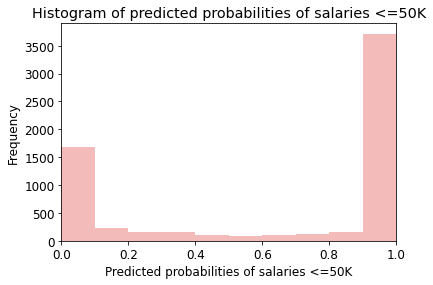

In [81]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10, color = '#F4BBBB', histtype = 'bar')


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries <=50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries <=50K')
plt.ylabel('Frequency')

**ROC - AUC**

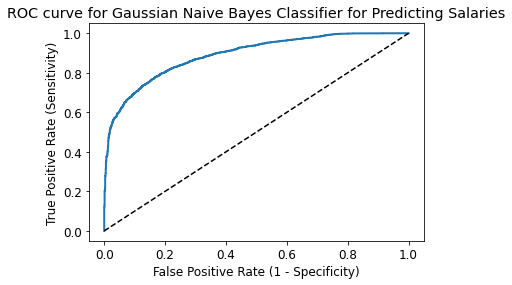

In [82]:
# ROC Curve
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '<=50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [83]:
# ROC AUC
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.1099


In [84]:
# Interpretation
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

Cross validated ROC AUC : 0.8939


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

**k-Fold Cross Validation**

In [85]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

Cross-validation scores:[0.81209213 0.80019194 0.80441459 0.80015358 0.79669802]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

In [86]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8027
